In [1]:

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.float_format',lambda x: '%.3f' % x ) # TO restrict the float value to three decimal places


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/ML/week3/Melbourne_Housing.csv')

In [4]:
data.head()

,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price
0,Airport West,3,t,Nelson,03-09-2016,13.500,3042.000,3.000,2.000,1.000,303.000,225,2016.000,Western Metropolitan,3464,840000
1,Albert Park,2,h,hockingstuart,03-09-2016,3.300,3206.000,2.000,1.000,0.000,120.000,82,1900.000,Southern Metropolitan,3280,1275000
2,Albert Park,2,h,Thomson,03-09-2016,3.300,3206.000,2.000,1.000,0.000,159.000,inf,NaN,Southern Metropolitan,3280,1455000
3,Alphington,4,h,Brace,03-09-2016,6.400,3078.000,3.000,2.000,4.000,853.000,263,1930.000,Northern Metropolitan,2211,2000000
4,Alphington,3,h,Jellis,03-09-2016,6.400,3078.000,3.000,2.000,2.000,208.000,inf,2013.000,Northern Metropolitan,2211,1110000


In [5]:
data.tail()

,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price
27109,Noble Park,3,h,C21,30-09-2017,22.700,3174.000,3.000,1.000,6.000,569.000,130,1959.000,South-Eastern Metropolitan,11806,627500
27110,Reservoir,3,u,RW,30-09-2017,12.000,3073.000,3.000,1.000,1.000,NaN,105,1990.000,Northern Metropolitan,21650,475000
27111,Roxburgh Park,4,h,Raine,30-09-2017,20.600,3064.000,4.000,2.000,2.000,NaN,225,1995.000,Northern Metropolitan,5833,591000
27112,Springvale South,3,h,Harcourts,30-09-2017,22.200,3172.000,3.000,2.000,1.000,544.000,NaN,NaN,South-Eastern Metropolitan,4054,780500
27113,Westmeadows,4,h,Barry,30-09-2017,16.500,3049.000,4.000,2.000,6.000,813.000,140,1960.000,Northern Metropolitan,2474,791000


In [ ]:
data.shape

(27114, 16)

In [ ]:
data.info() # here we finding out the mistakes that buliding area in the stirng format we need to change it

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27114 entries, 0 to 27113
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         27114 non-null  object 
 1   Rooms          27114 non-null  int64  
 2   Type           27114 non-null  object 
 3   SellerG        27114 non-null  object 
 4   Date           27114 non-null  object 
 5   Distance       27113 non-null  float64
 6   Postcode       27113 non-null  float64
 7   Bedroom        20678 non-null  float64
 8   Bathroom       20672 non-null  float64
 9   Car            20297 non-null  float64
 10  Landsize       17873 non-null  float64
 11  BuildingArea   10543 non-null  object 
 12  YearBuilt      11985 non-null  float64
 13  Regionname     27114 non-null  object 
 14  Propertycount  27114 non-null  int64  
 15  Price          27114 non-null  int64  
dtypes: float64(7), int64(3), object(6)
memory usage: 3.3+ MB


In [4]:
# now change date to date time format column
data['Date'] = pd.to_datetime(data['Date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27114 entries, 0 to 27113
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         27114 non-null  object        
 1   Rooms          27114 non-null  int64         
 2   Type           27114 non-null  object        
 3   SellerG        27114 non-null  object        
 4   Date           27114 non-null  datetime64[ns]
 5   Distance       27113 non-null  float64       
 6   Postcode       27113 non-null  float64       
 7   Bedroom        20678 non-null  float64       
 8   Bathroom       20672 non-null  float64       
 9   Car            20297 non-null  float64       
 10  Landsize       17873 non-null  float64       
 11  BuildingArea   10543 non-null  object        
 12  YearBuilt      11985 non-null  float64       
 13  Regionname     27114 non-null  object        
 14  Propertycount  27114 non-null  int64         
 15  Price          2711

<ipython-input-4-9b520a278d5b>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Date'] = pd.to_datetime(data['Date'])


In [5]:
#  now changing the buliding area that string format to the float or integer or NAN format
data["BuildingArea"].unique()

# so in the builidng area there are inf and missing values are presnt so then set to NAN format
data["BuildingArea"] = data["BuildingArea"].replace(['missing','inf'],np.nan)

# changing the data type to float
data["BuildingArea"] = data["BuildingArea"].astype(float)
# now check in data info building area is shwoing that float type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27114 entries, 0 to 27113
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         27114 non-null  object        
 1   Rooms          27114 non-null  int64         
 2   Type           27114 non-null  object        
 3   SellerG        27114 non-null  object        
 4   Date           27114 non-null  datetime64[ns]
 5   Distance       27113 non-null  float64       
 6   Postcode       27113 non-null  float64       
 7   Bedroom        20678 non-null  float64       
 8   Bathroom       20672 non-null  float64       
 9   Car            20297 non-null  float64       
 10  Landsize       17873 non-null  float64       
 11  BuildingArea   10529 non-null  float64       
 12  YearBuilt      11985 non-null  float64       
 13  Regionname     27114 non-null  object        
 14  Propertycount  27114 non-null  int64         
 15  Price          2711

In [8]:


# for checking the total number of null values prsent in the column
data.isnull().sum()

Suburb               0
Rooms                0
Type                 0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom           6436
Bathroom          6442
Car               6817
Landsize          9241
BuildingArea     16585
YearBuilt        15129
Regionname           0
Propertycount        0
Price                0
dtype: int64

In [9]:
# for checking the duplicate entities in the data
data.duplicated().sum()

11

In [6]:
# for dropping down the duplicate rows present in the data
data.drop_duplicates(inplace = True)

In [11]:
data.duplicated().sum()

0

In [7]:
# resetting the index of the data since some rows are removed
data.reset_index(drop=True,inplace=True)

In [12]:
# for checking the total count of unique valuels present in column
data['Postcode'].nunique()

209

In [8]:
# Lets check and count of percentage of categorical values

lst = ['Type','SellerG']
for c in lst:
  print(data[c].value_counts())
  print("-"*50)

h    18394
u     5882
t     2827
Name: Type, dtype: int64
--------------------------------------------------
Nelson           2733
Jellis           2516
Barry            2385
hockingstuart    2096
Ray              1574
                 ... 
Allan               1
Jim                 1
iProperty           1
Batty               1
Icon                1
Name: SellerG, Length: 347, dtype: int64
--------------------------------------------------


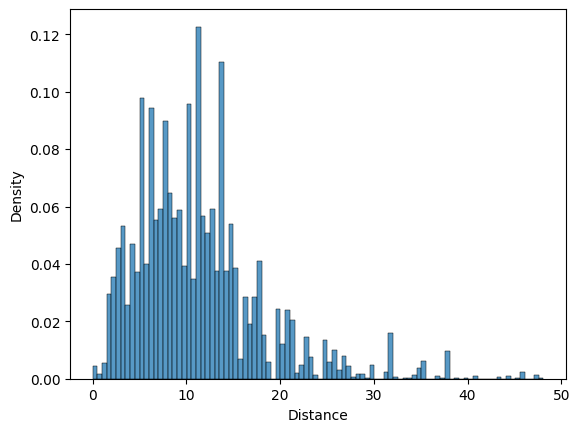

In [ ]:
# univariate analysis
sns.histplot(data=data,x='Distance',stat='density')
plt.show()

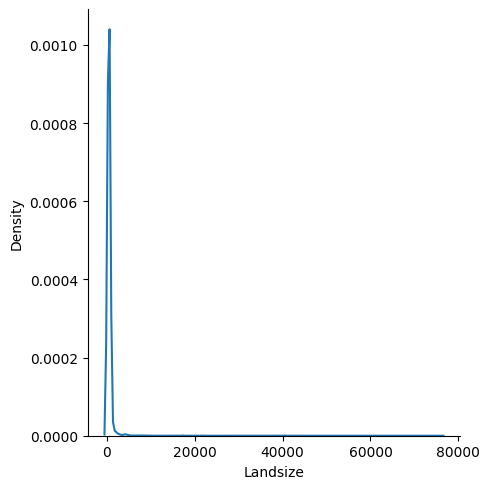

In [ ]:
sns.displot(data = data , x = data['Landsize'],kind='kde')

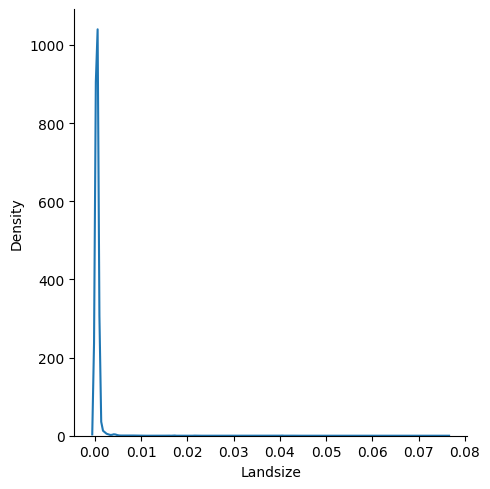

In [ ]:
sns.displot(data = data , x = data['Landsize']/1000000,kind='kde')

<Axes: xlabel='Landsize'>

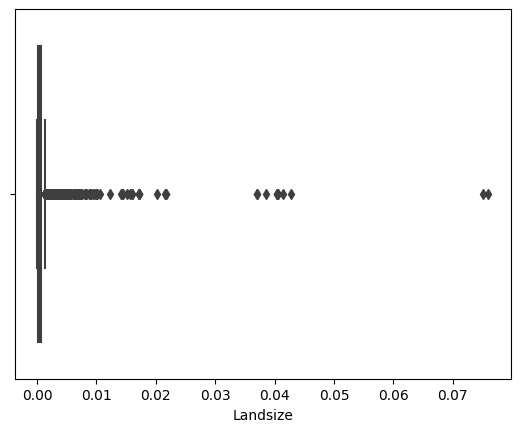

In [ ]:
sns.boxplot(data=data,x=data['Landsize']/1000000)

In [ ]:
data.loc[data['Landsize']>6000]

,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price
497,Port Melbourne,2,u,Chisholm,03-12-2016,3.800,3207.000,2.000,2.000,2.000,21700.000,NaN,2000.000,Southern Metropolitan,8648,1340000
532,South Yarra,1,u,hockingstuart,03-12-2016,3.300,3141.000,1.000,1.000,0.000,14500.000,NaN,2011.000,Southern Metropolitan,14887,315000
1362,Richmond,1,u,McGrath,07-05-2016,2.600,3121.000,1.000,1.000,1.000,7455.000,53,2005.000,Northern Metropolitan,14949,405000
1379,St Kilda,3,u,hockingstuart,07-05-2016,6.100,3182.000,3.000,1.000,2.000,7170.000,NaN,NaN,Southern Metropolitan,13240,610000
1921,Richmond,1,u,Ray,08-10-2016,2.600,3121.000,1.000,1.000,1.000,8223.000,45,2012.000,Northern Metropolitan,14949,345000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26028,Port Melbourne,3,h,Marshall,28-10-2017,3.500,3207.000,3.000,2.000,NaN,9071.000,134,1910.000,Southern Metropolitan,8648,1585000
26046,Princes Hill,2,h,Collins,28-10-2017,3.500,3054.000,2.000,1.000,NaN,8970.000,NaN,NaN,Northern Metropolitan,1008,938000
26396,Port Melbourne,2,u,Buxton,29-04-2017,3.800,3207.000,2.000,2.000,2.000,21715.000,99,2005.000,Southern Metropolitan,8648,1030000
26834,South Yarra,2,u,hockingstuart,29-07-2017,2.700,3141.000,2.000,2.000,2.000,17200.000,NaN,2000.000,Southern Metropolitan,14887,1090000


In [9]:
# Bivariate analasys
data["Total_space"] = data['Bathroom'] + data['Bedroom'] + data['Car']

In [16]:
data[['Total_space','Price']].corr()

,Total_space,Price
Total_space,1.000,0.438
Price,0.438,1.000


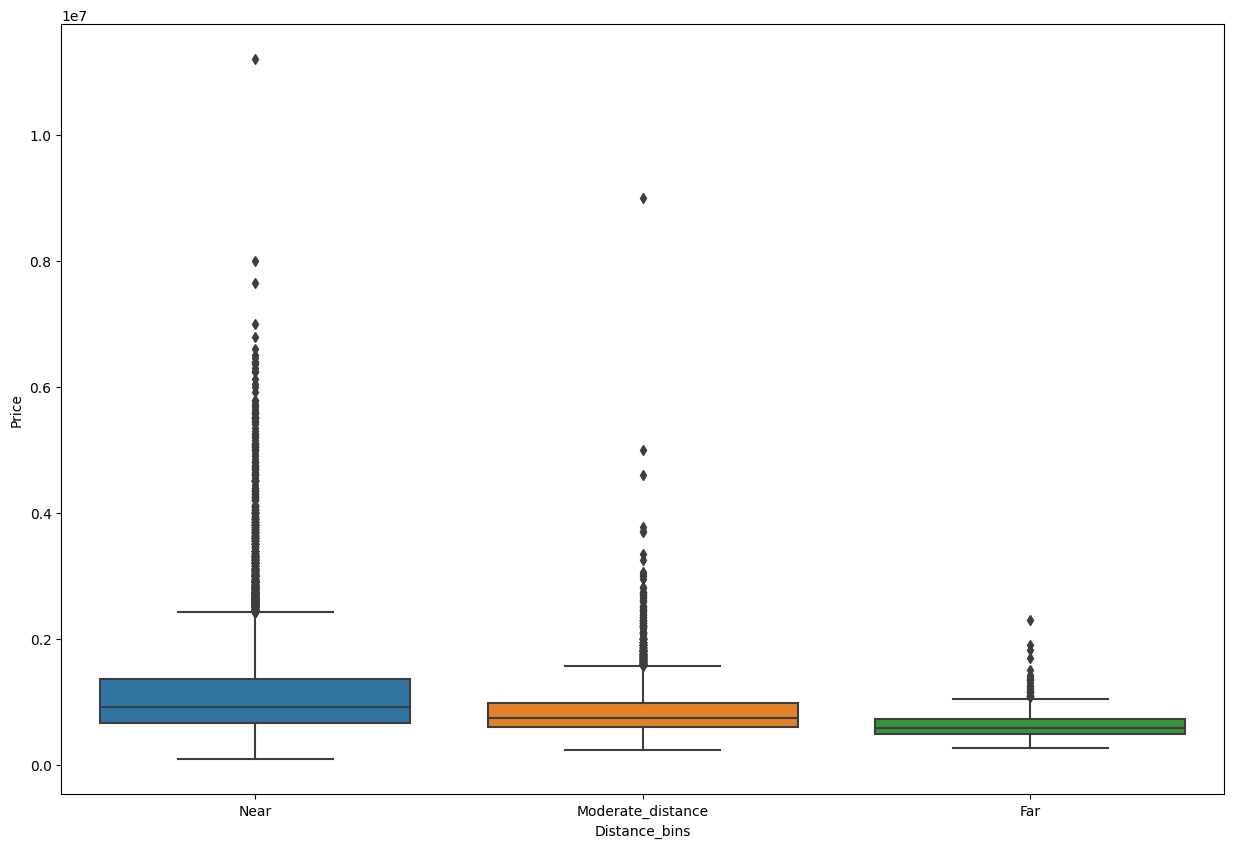

0                     Near
1                     Near
2                     Near
3                     Near
4                     Near
               ...        
27098    Moderate_distance
27099                 Near
27100    Moderate_distance
27101    Moderate_distance
27102    Moderate_distance
Name: Distance_bins, Length: 27103, dtype: category
Categories (3, object): ['Near' < 'Moderate_distance' < 'Far']


In [10]:
data['Distance_bins'] = pd.cut(data['Distance'],bins=[0,15,30,50], labels = ['Near','Moderate_distance','Far'],right = 'False')
# This code is used to create bins and cheking in the distance column if it is 0 to 15 then it is near , 15 to 30 it is moderate distance finally 30 to 50 far
plt.figure(figsize=(15,10))
sns.boxplot(data = data , x = "Distance_bins" ,y = "Price" )
plt.show()
print(data["Distance_bins"])

In [11]:
# lets first evaluate the age of the house taking the year sale year
year_sale_year = data["Date"].dt.year
year_sale_year

# after the calucating the house age with saledyear - built year

data["Agegroup"] = year_sale_year - data["YearBuilt"]
data.head()

,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price,Total_space,Distance_bins,Agegroup
0,Airport West,3,t,Nelson,2016-03-09,13.500,3042.000,3.000,2.000,1.000,303.000,225.000,2016.000,Western Metropolitan,3464,840000,6.000,Near,0.000
1,Albert Park,2,h,hockingstuart,2016-03-09,3.300,3206.000,2.000,1.000,0.000,120.000,82.000,1900.000,Southern Metropolitan,3280,1275000,3.000,Near,116.000
2,Albert Park,2,h,Thomson,2016-03-09,3.300,3206.000,2.000,1.000,0.000,159.000,NaN,NaN,Southern Metropolitan,3280,1455000,3.000,Near,NaN
3,Alphington,4,h,Brace,2016-03-09,6.400,3078.000,3.000,2.000,4.000,853.000,263.000,1930.000,Northern Metropolitan,2211,2000000,9.000,Near,86.000
4,Alphington,3,h,Jellis,2016-03-09,6.400,3078.000,3.000,2.000,2.000,208.000,NaN,2013.000,Northern Metropolitan,2211,1110000,7.000,Near,3.000


<ipython-input-36-204f8a268e18>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data = data , x = "Agegroup",y = "Price",ci= None)


<Axes: xlabel='Agegroup', ylabel='Price'>

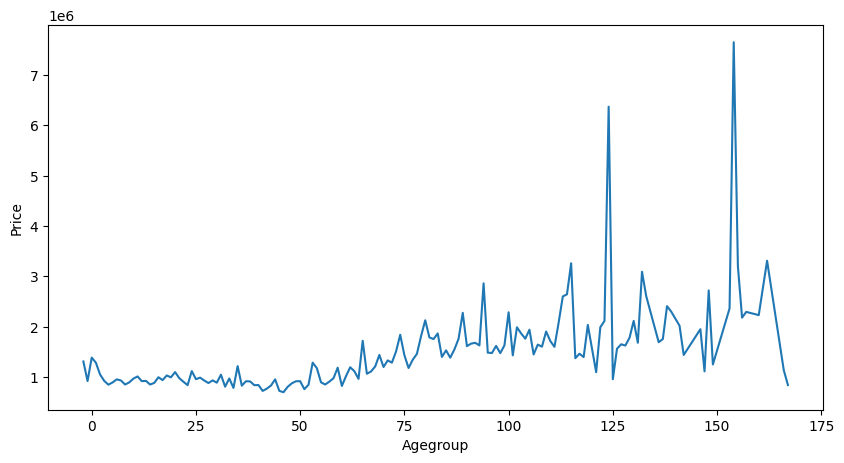

In [36]:
plt.figure(figsize=(10,5))
sns.lineplot(data = data , x = "Agegroup",y = "Price",ci= None)

Index(['Suburb', 'Rooms', 'Type', 'SellerG', 'Date', 'Distance', 'Postcode',
       'Bedroom', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt',
       'Regionname', 'Propertycount', 'Price', 'Total_space', 'Distance_bins',
       'Agegroup'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/

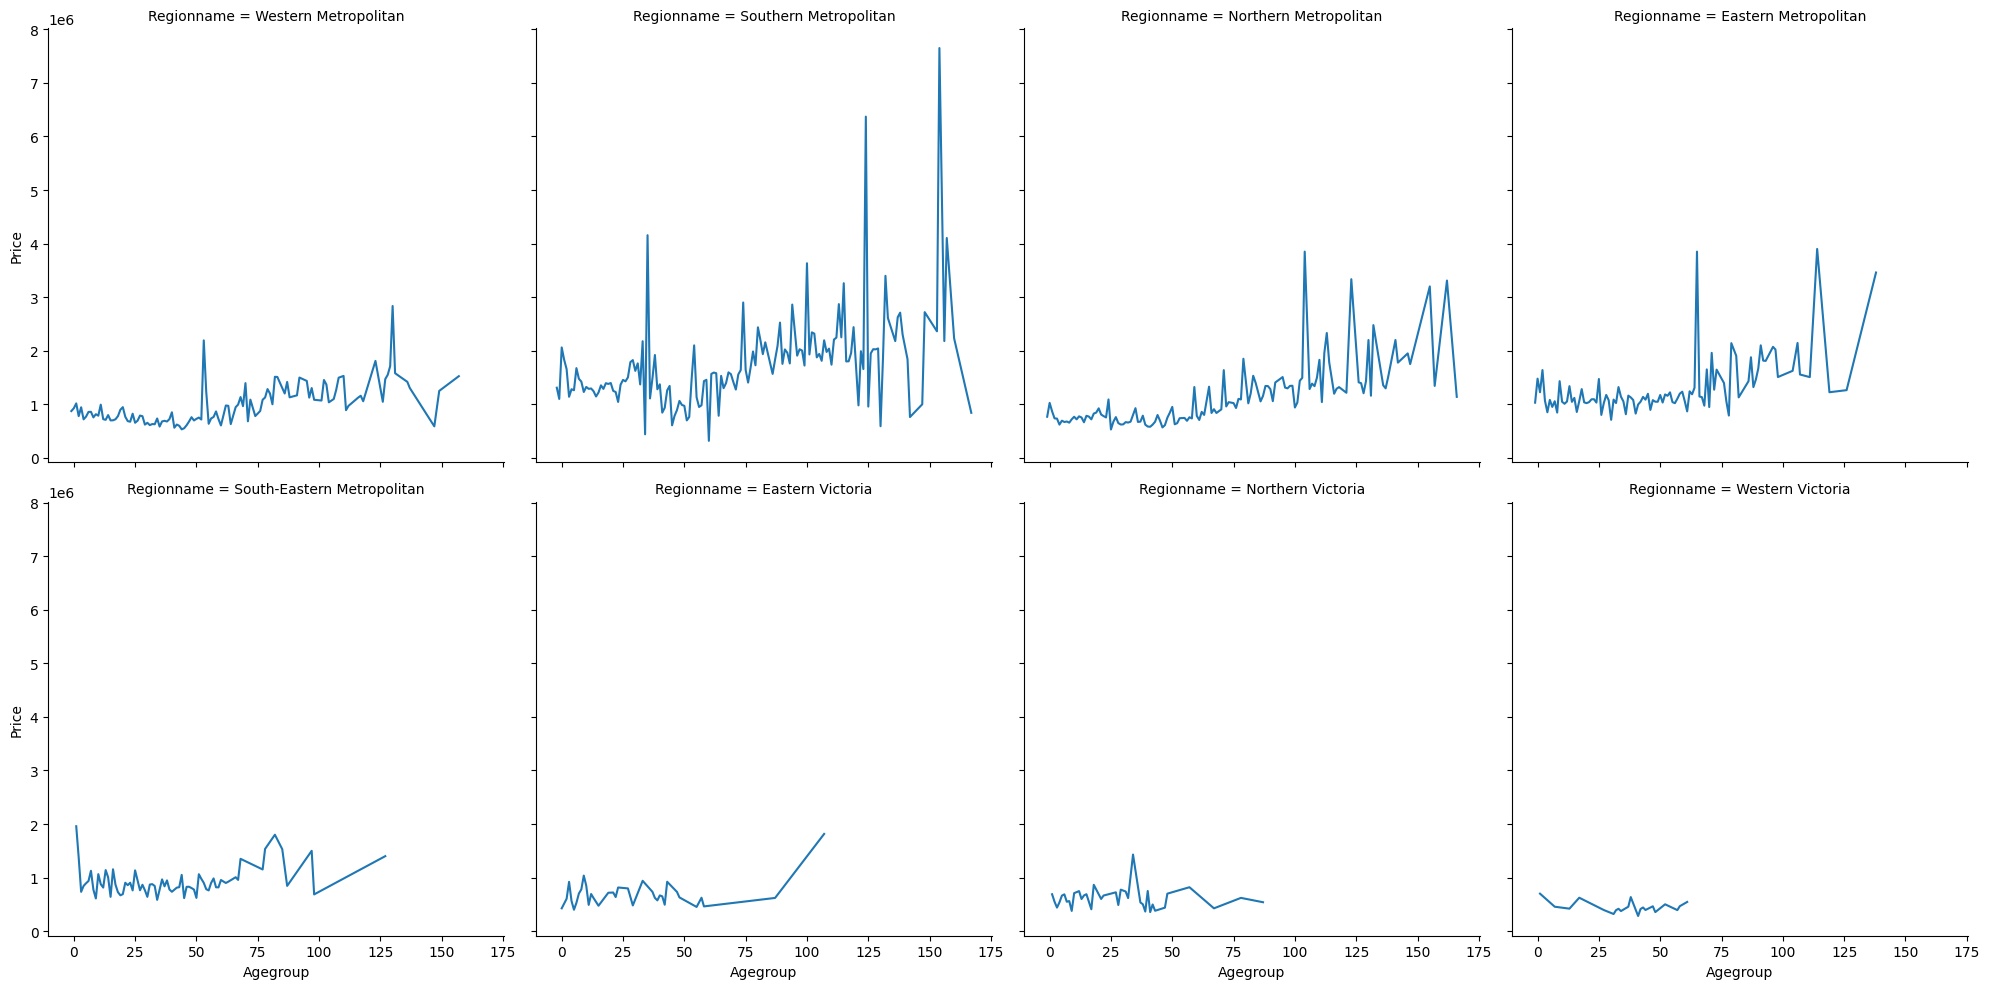

In [12]:
# Reploat is used to visualize any statistical relationship between "QUANTITATIVE" variables

# col_wrap specifies no of the columns in the grid


print(data.columns)
sns.relplot(data=data, x="Agegroup", y="Price", col="Regionname", kind='line',ci = None , col_wrap=4)
plt.show()

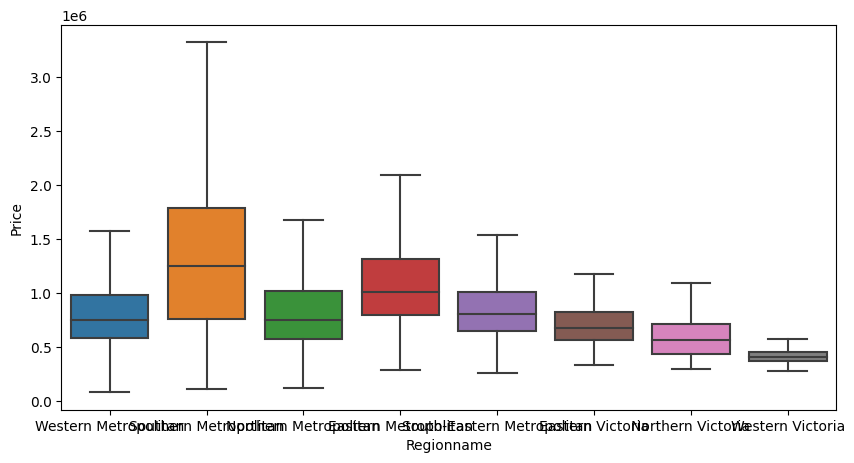

In [68]:
# The above thing we can do using box plot also
plt.figure(figsize=(10,5))
sns.boxplot(data = data , x = "Regionname",y= "Price",showfliers= False)

plt.show()

In [13]:

#  MISSING VALUE TREATMENT

data.shape[0] # it give the  count of number of rows present in the data

pd.DataFrame({'count':data.isnull().sum()[data.isnull().sum()>0],"Percentage":data.isnull().sum()[data.isnull().sum()>0]/data.shape[0]*100})


,count,Percentage
Distance,1,0.004
Postcode,1,0.004
Bedroom,6425,23.706
Bathroom,6431,23.728
Car,6806,25.112
Landsize,9230,34.055
BuildingArea,16574,61.152
YearBuilt,15118,55.780
Total_space,6806,25.112
Distance_bins,59,0.218


In [ ]:
# extracting the  rows data where distance is zero
data.loc[data["Distance"].isnull()==True]
# Here this  row is having higest missing data so this type of rows need to be deleted , other wise even we do mean or median it varies a lot so drop this type of columns



In [14]:
# For checking the rows where the bedroom data is null
data.loc[data["Bedroom"].isnull()==True]

,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price,Total_space,Distance_bins,Agegroup
8,Altona North,4,h,hockingstuart,2016-03-09,11.100,3025.000,NaN,NaN,NaN,NaN,NaN,NaN,Western Metropolitan,5132,857500,NaN,Near,NaN
12,Ashburton,2,h,Marshall,2016-03-09,11.000,3147.000,NaN,NaN,NaN,NaN,NaN,NaN,Southern Metropolitan,3052,1820000,NaN,Near,NaN
14,Avondale Heights,4,h,Jellis,2016-03-09,10.500,3034.000,NaN,NaN,NaN,NaN,NaN,NaN,Western Metropolitan,4502,1310000,NaN,Near,NaN
25,Balwyn North,4,u,hockingstuart,2016-03-09,9.200,3104.000,NaN,NaN,NaN,NaN,NaN,NaN,Southern Metropolitan,7809,1450000,NaN,Near,NaN
26,Balwyn North,2,h,Fletchers,2016-03-09,9.200,3104.000,NaN,NaN,NaN,NaN,NaN,NaN,Southern Metropolitan,7809,1305000,NaN,Near,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27089,Footscray,2,u,McGrath,2017-09-30,5.100,3011.000,NaN,NaN,NaN,NaN,NaN,NaN,Western Metropolitan,7570,455500,NaN,Near,NaN
27090,Forest Hill,2,h,Fletchers,2017-09-30,15.400,3131.000,NaN,NaN,NaN,NaN,NaN,NaN,Eastern Metropolitan,4385,762000,NaN,Moderate_distance,NaN
27091,Glen Waverley,3,u,Ray,2017-09-30,16.700,3150.000,NaN,NaN,NaN,NaN,NaN,NaN,Eastern Metropolitan,15321,1100000,NaN,Moderate_distance,NaN
27094,Kingsbury,2,t,RW,2017-09-30,12.100,3083.000,NaN,NaN,NaN,NaN,NaN,NaN,Northern Metropolitan,1414,512000,NaN,Near,NaN


In [15]:
# For checking the data where both bedroom and bathroom is null

data.loc[data['Bedroom'].isnull()==True,'Bathroom'].value_counts(dropna=False)


NaN    6425
Name: Bathroom, dtype: int64

In [17]:
# For checking the data where both bedroom and bathroom is null
data.loc[data["Bedroom"].isnull()==True,"Car"].value_counts(dropna=False)

NaN    6425
Name: Car, dtype: int64

In [21]:
pd.DataFrame({"Count":data.isnull().sum()[data.isnull().sum()>0]})

,Count
Distance,1
Postcode,1
Bedroom,6425
Bathroom,6431
Car,6806
Landsize,9230
BuildingArea,16574
YearBuilt,15118
Total_space,6806
Distance_bins,59


In [23]:
# getting the normal mean values of the bed room and bathroom and car  by grouping the region name and type
data.groupby(['Regionname','Type'])[['Bedroom','Bathroom','Car']].mean()

Bedroom  Bathroom   Car
Regionname                 Type                         
Eastern Metropolitan       h       3.552     1.807 1.946
                           t       3.032     1.853 1.673
                           u       2.357     1.263 1.290
Eastern Victoria           h       3.560     1.881 2.098
                           u       2.667     1.000 1.333
Northern Metropolitan      h       3.106     1.468 1.685
                           t       2.567     1.620 1.362
                           u       1.878     1.160 1.093
Northern Victoria          h       3.496     1.892 2.146
                           u       3.000     2.000 2.000
South-Eastern Metropolitan h       3.476     1.713 2.094
                           t       2.887     1.849 1.679
                           u       2.260     1.205 1.342
Southern Metropolitan      h       3.383     1.840 1.883
                           t       3.024     2.012 1.780
                           u       1.939     1.191 1.135
Western Metropolitan       h       3.244     1.576 1.907
                           t       2.880     1.851 1.538
                           u       2.106     1.192 1.144
Western Victoria           h       3.379     1.448 2.060

In [28]:
# Here i imputed the missing values with the mean of the bed room vlaues
# here i used two functions in that first one is FILLNA()FUNCTION -- >  is used to fill nan values using provied input values  ---- syntax : ----> DATA['COLUMNS'].FILLNA(VALUE=X)
#  Another one is TRANSFORM FUNCTION() --- >  works on each value of a Dataframe and allows to execute a specified fuction on each value ---- syntax ---- > DATA.TRANSFORM(FUNC = function name)

data["Bedroom"] = data["Bedroom"].fillna(value = data.groupby(['Regionname','Type'])['Bedroom'].transform('mean'))
pd.DataFrame({"count":data.isnull().sum()[data.isnull().sum()>0]})

,count
Distance,1
Postcode,1
Bathroom,6431
Car,6806
Landsize,9230
BuildingArea,16574
YearBuilt,15118
Total_space,6806
Distance_bins,59
Agegroup,15118


In [34]:
# Here i imputed the bathtoom and car missing values with their means
data["Bathroom"] = data['Bathroom'].fillna(value = data.groupby(['Regionname','Type'])['Bathroom'].transform('mean'))
pd.DataFrame({"count":data.isnull().sum()[data.isnull().sum()>0]}) # used to count the how many missing values are present
data['Car'] = data["Car"].fillna(value = data.groupby(['Regionname','Type'])['Car'].transform('median'))
pd.DataFrame({"count":data.isnull().sum()[data.isnull().sum()>0]})

,count
Distance,1
Postcode,1
Landsize,9230
BuildingArea,16574
YearBuilt,15118
Total_space,6806
Distance_bins,59
Agegroup,15118


IF it has still more missing data means delete the data from the data frame and sacve it
